In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
# 设置中文字体
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # Windows: 黑体
matplotlib.rcParams['axes.unicode_minus'] = False  # 防止负号显示异常

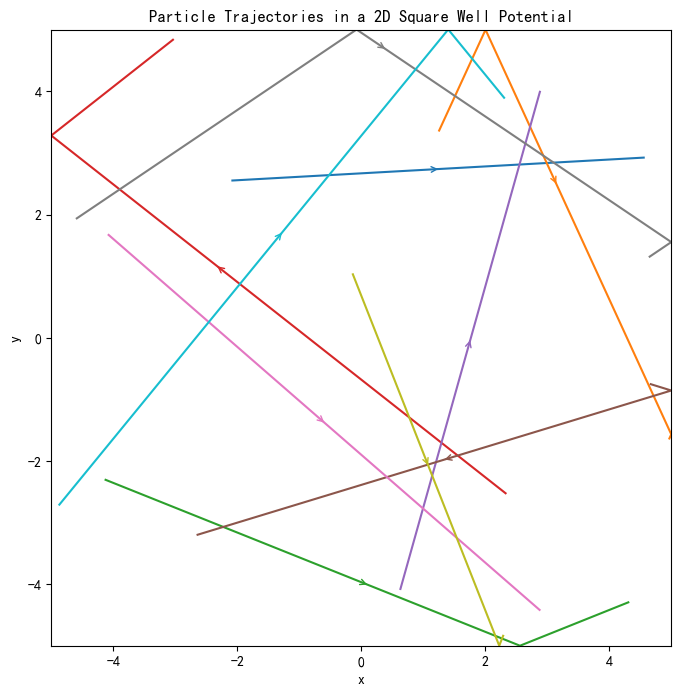

In [3]:


# 参数设置
num_particles = 10  # 粒子数量
steps = 1000        # 时间步数
dt = 0.01           # 时间步长
box_size = 10       # 方形势阱的边长（假设从 -box_size/2 到 box_size/2）

# 初始化粒子的位置和速度
positions = np.random.uniform(-box_size/2, box_size/2, (num_particles, 2))
velocities = np.random.uniform(-1, 1, (num_particles, 2))

# 存储轨迹
trajectories = np.zeros((num_particles, steps, 2))

# 模拟运动
for i in range(steps):
    positions += velocities * dt
    # 检测并处理与势阱边界的碰撞
    for j in range(num_particles):
        for dim in range(2):
            if positions[j, dim] <= -box_size/2:
                positions[j, dim] = -box_size/2
                velocities[j, dim] *= -1
            elif positions[j, dim] >= box_size/2:
                positions[j, dim] = box_size/2
                velocities[j, dim] *= -1
    trajectories[:, i, :] = positions

# 绘制轨迹
fig, ax = plt.subplots(figsize=(8, 8))
for i in range(num_particles):
    ax.plot(trajectories[i, :, 0], trajectories[i, :, 1], label=f'Particle {i+1}')
    # 添加箭头表示运动方向
    arrow_index = steps // 2
    ax.annotate('', xy=trajectories[i, arrow_index, :], xytext=trajectories[i, arrow_index-1, :],
                arrowprops=dict(arrowstyle='->', color=ax.lines[-1].get_color()))
# 绘制势阱边界
ax.set_xlim(-box_size/2, box_size/2)
ax.set_ylim(-box_size/2, box_size/2)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Particle Trajectories in a 2D Square Well Potential')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'F:\\output\\classic_trap_trajectories.png'

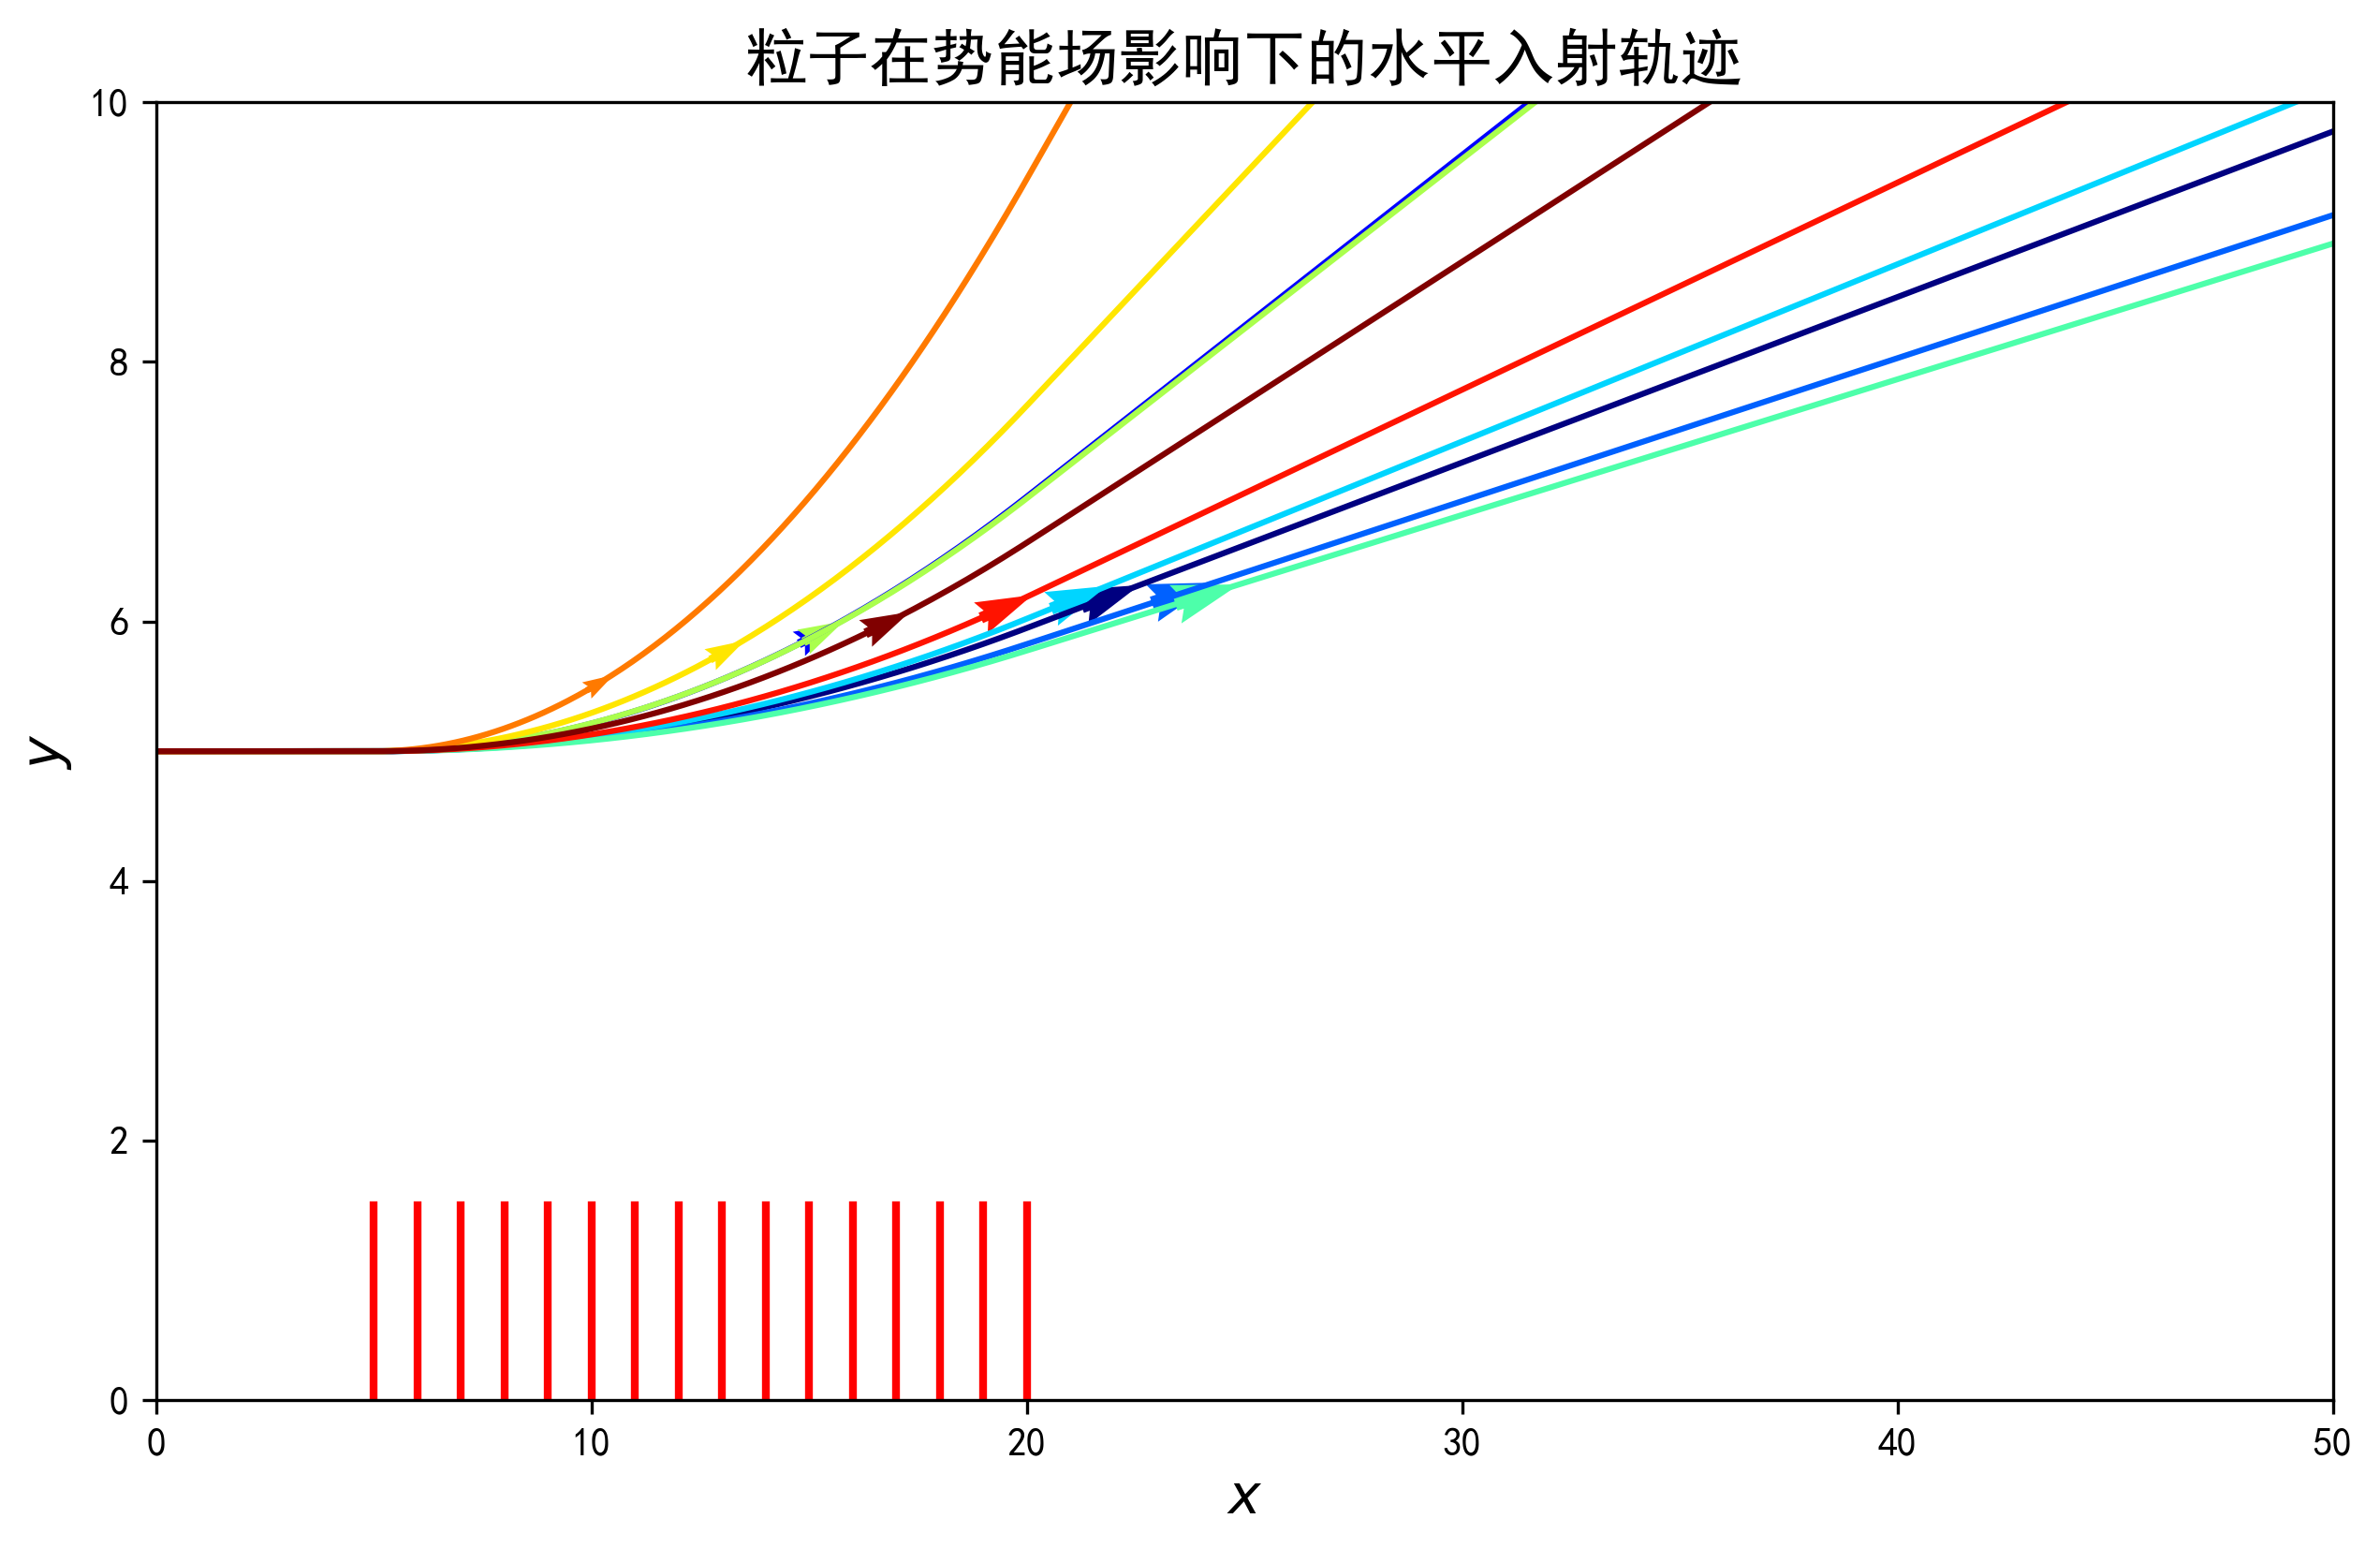

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 初始化模拟参数
num_particles = 10  # 粒子数量
steps = 400          # 时间步数
dt = 0.01            # 时间步长
width = 50           # 图像宽度
height = 10          # 图像高度
emit_region_height = 1  # 发射带高度（粒子在 y = 5 附近发射）
potential_region_start = 5  # 势能场起始位置
potential_region_end = 20    # 势能场结束位置
potential_height = 1.5  # 势能场高度

# 为每个粒子分配颜色
colors = plt.cm.jet(np.linspace(0, 1, num_particles))

# 存储所有粒子的轨迹，每个轨迹的 shape 为 (steps, 2)
trajectories = []

# 定义势能场函数（简单的矩形势垒）
def potential_energy(x):
    if potential_region_start <= x <= potential_region_end:
        return potential_height
    else:
        return 0

# 对每个粒子进行模拟
for n in range(num_particles):
    trajectory = np.zeros((steps, 2))
    # 在 y = 5 附近随机选择初始位置
    y0 = 5
    r = np.array([0.0, y0])
    # 随机生成初始速度的大小（仅沿 x 轴）
    speed = np.random.uniform(5, 15)  # 初始速度大小在 [5, 15] 范围内
    v = np.array([speed, 0.0])  # 水平发射，垂直速度为零
    for i in range(steps):
        trajectory[i] = r  # 记录当前位置
        
        # 计算当前位置的势能场对粒子的影响（加速度）
        pe = potential_energy(r[0])
        if pe > 0:
            # 假设势能场对粒子产生垂直向上的加速度
            a = np.array([0.0, pe])
        else:
            a = np.array([0.0, 0.0])
        
        # 使用速度 Verlet 方法更新位置
        r = r + v * dt + 0.5 * a * dt**2
        # 更新速度
        v = v + a * dt
    
    trajectories.append(trajectory)

# 绘制轨迹
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
ax.set_xlim(0, width)
ax.set_ylim(0, height)
ax.set_xlabel(r"$x$", fontsize=14)
ax.set_ylabel(r"$y$", fontsize=14)
ax.set_title(r"粒子在势能场影响下的水平入射轨迹", fontsize=16)

# 绘制势能场区域
for x in range(potential_region_start, potential_region_end + 1):
    ax.plot([x, x], [0, potential_height], color='red', linewidth=2)

# 绘制粒子轨迹
for n, trajectory in enumerate(trajectories):
    ax.plot(trajectory[:, 0], trajectory[:, 1], color=colors[n], linewidth=1.5)
    
    # 在轨迹上选择箭头位置，比如后 40% 的位置
    arrow_index = int(len(trajectory) * 0.4)
    if arrow_index < len(trajectory) - 1:
        start_point = trajectory[arrow_index]
        end_point = trajectory[arrow_index + 1]
        vector = end_point - start_point
        # 如果需要，还可以对 vector 进行放大
        scale_factor = 10 # 根据需要调整放大倍数
        vector = vector * scale_factor
        ax.quiver(start_point[0], start_point[1], vector[0], vector[1],
                  angles='xy', scale_units='xy', scale=1, color=colors[n])

plt.savefig("/output/classic_trap_trajectories.png", dpi=300)
plt.show()


Simulating particles: 100%|██████████| 1000/1000 [00:01<00:00, 639.94it/s]


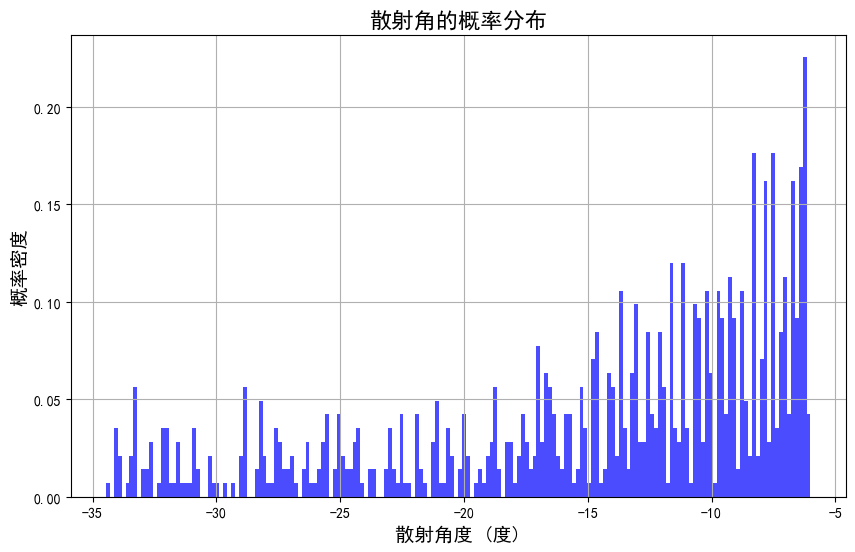

In [6]:
from tqdm import tqdm

# 初始化参数
num_particles = int(1e3)  # 粒子数量
steps = 500               # 每个粒子的最大时间步数
dt = 0.01                 # 时间步长
width = 50                # 模拟区域宽度
height = 10               # 模拟区域高度
emit_y_center = 5         # 发射区域中心 y 坐标
emit_y_range = 0.1        # 发射区域 y 范围
potential_start = 25      # 势能场起始位置
potential_end = 30        # 势能场结束位置
potential_height = 5      # 势能场高度

# 定义势能场函数
def potential_energy(x):
    if potential_start <= x <= potential_end:
        return potential_height
    else:
        return 0

# 初始化散射角列表
scattering_angles = []

# 对每个粒子进行模拟
for _ in tqdm(range(num_particles), desc="Simulating particles"):
    # 初始位置
    y0 = np.random.uniform(emit_y_center - emit_y_range / 2, emit_y_center + emit_y_range / 2)
    r = np.array([0.0, y0])
    # 初始速度（水平向右）
    speed = np.random.uniform(5, 15)
    v = np.array([speed, 0.0])
    # 初始化加速度
    a = np.array([0.0, 0.0])
    # 记录初始位置和速度
    r_old = r - v * dt

    # 模拟粒子运动
    for _ in range(steps):
        # 更新位置
        r_new = 2 * r - r_old + a * dt**2
        # 更新速度
        v = (r_new - r_old) / (2 * dt)
        # 更新加速度
        pe = potential_energy(r[0])
        if pe > 0:
            a = np.array([0.0, -pe])
        else:
            a = np.array([0.0, 0.0])
        # 更新旧位置和当前位置信息
        r_old = r
        r = r_new

        # 判断粒子是否离开势能场区域
        if r[0] > potential_end:
            # 计算散射角
            scattering_angle = np.arctan2(v[1], v[0])
            scattering_angles.append(scattering_angle)
            break

# 将散射角转换为度
scattering_angles = np.degrees(scattering_angles)

# 绘制散射角的概率分布
plt.figure(figsize=(10, 6))
plt.hist(scattering_angles, bins=180, density=True, alpha=0.7, color='blue')
plt.xlabel("散射角度 (度)", fontsize=14)
plt.ylabel("概率密度", fontsize=14)
plt.title("散射角的概率分布", fontsize=16)
plt.grid(True)
plt.show()


Loaded cached scattering angles data.


C:\Users\glue\AppData\Local\Temp\ipykernel_108720\3725156540.py:100: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  Z = np.trapz(p_theta, theta_grid)


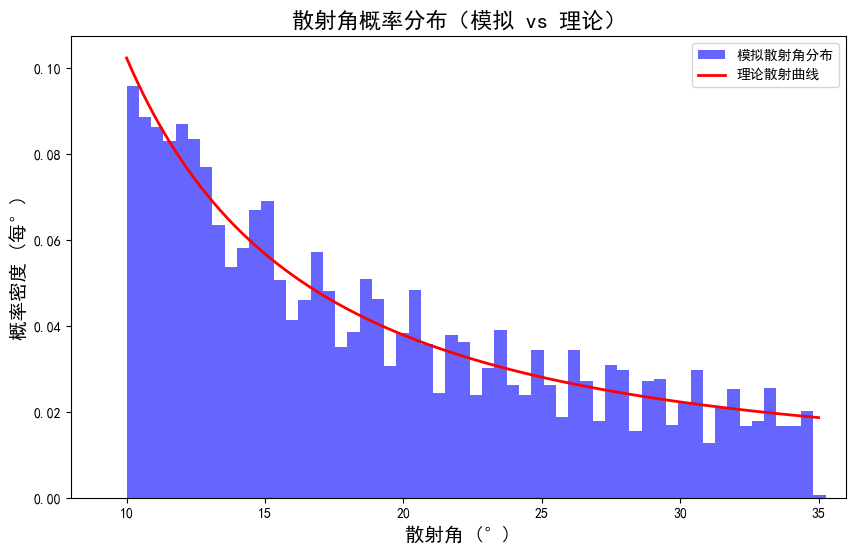

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import os

# -------------------------------
# 模拟参数设置
# -------------------------------
num_particles = int(1e5)  # 调试时先用1e5，正式运行时可改为1e7
steps = 500              # 每个粒子的最大时间步数
dt = 0.01                # 时间步长

# 发射区域参数：所有粒子从 x=0 发射，y 坐标在 [5 - Δy/2, 5 + Δy/2] 内
emit_y_center = 5.0
emit_y_range = 0.5       # 发射带高度

# 势能场（势垒）参数：位于 x ∈ [25,30]，势能高度 V0
potential_start = 25.0
potential_end = 30.0
V0 = 5.0               # 势垒高度

# -------------------------------
# 模拟散射过程，收集散射角数据
# -------------------------------
scattering_angles = []  # 记录散射角（单位：弧度）
# 读取缓存
if os.path.exists("./output/classic_trap_scattering_angles.npy"):
    scattering_angles = np.load("./output/classic_trap_scattering_angles.npy")
    print("Loaded cached scattering angles data.")
else:
    # 对每个粒子进行模拟
    for _ in tqdm(range(num_particles), desc="Simulating particles"):
        # 初始位置：x=0，y在 [emit_y_center - emit_y_range/2, emit_y_center + emit_y_range/2]
        y0 = np.random.uniform(emit_y_center - emit_y_range/2, emit_y_center + emit_y_range/2)
        r = np.array([0.0, y0])
        # 初始速度：水平向右，随机大小在 [5,15]
        speed = np.random.uniform(5, 15)
        v = np.array([speed, 0.0])
        
        # 模拟该粒子的运动，采用简化的 Verlet 积分：
        for _ in range(steps):
            # 判断是否在势能场区域
            if potential_start <= r[0] <= potential_end:
                # 在势垒区域，粒子受到向下恒定加速度 a_y = -V0
                a = np.array([0.0, -V0])
            else:
                a = np.array([0.0, 0.0])
            # 更新位置和速度（简化Verlet）
            r = r + v * dt + 0.5 * a * dt**2
            v = v + a * dt
            # 当粒子离开势垒区域（x > potential_end），记录散射角并结束模拟
            if r[0] > potential_end:
                theta = np.arctan2(v[1], v[0])
                scattering_angles.append(theta)
                break
        
        # 缓存scattering_angles_deg
        np.save("./output/classic_trap_scattering_angles.npy", scattering_angles_deg)
            


scattering_angles = np.array(scattering_angles)
# 转换散射角为度数
scattering_angles_deg = np.degrees(scattering_angles)

# -------------------------------
# 绘制模拟散射角概率密度直方图
# -------------------------------
plt.figure(figsize=(10, 6))
bins = np.linspace(10, 45, 80)
hist_vals, bin_edges, _ = plt.hist(-scattering_angles, bins=bins, density=True,
                                   alpha=0.6, color='blue', label="模拟散射角分布")

# -------------------------------
# 理论散射曲线计算（限定在 10°到 40°范围内）
# -------------------------------
# 理论模型简化：
# 对于水平速度 u 的粒子，在势垒区域内时间 T = (potential_end - potential_start)/u，
# 垂直速度变化 Δv_y = -V0 * T = -V0*(5)/u，
# 散射角 θ = arctan(|Δv_y|/u) = arctan(V0*5/u^2).
# 令 C = V0*5 = 25.
# 反解得到 u = sqrt(C/tanθ).
# 若 u 均匀分布于 [5,15]，p(u)=1/10。
# 通过变量变换得到未归一化的理论概率密度（以弧度为单位）：
#   p(θ) = (1/10)*|du/dθ|, 其中 u(θ) = sqrt(C/tanθ),
#   du/dθ = -0.5 * sqrt(C)*tan(θ)^(-3/2)*sec^2θ.
# 因此：
#   p(θ) = (1/10)*0.5*sqrt(C)*sec^2θ/(tan(θ)^(3/2)).
# 为了绘制“每度”的概率密度，需要将 p(θ) 乘以 (π/180)。
C = 25.0
def p_theta_unorm(theta):
    return (0.5 * np.sqrt(C) * (1/np.cos(theta))**2 / (np.tan(theta)**1.5)) / 10

# 限定理论计算的角度范围为10°到40°
theta_min_deg = 10
theta_max_deg = 35
theta_grid = np.linspace(np.radians(theta_min_deg), np.radians(theta_max_deg), 1000)
p_theta = p_theta_unorm(theta_grid)
# 数值归一化（以弧度为单位）
Z = np.trapz(p_theta, theta_grid)
p_theta_norm = p_theta / Z
# 转换为以度为单位的概率密度：乘以 (π/180)
p_theta_deg = p_theta_norm * (np.pi/180)

# 绘制理论曲线
plt.plot(np.degrees(theta_grid), p_theta_deg, 'r-', lw=2, label="理论散射曲线")
plt.xlabel("散射角 (°)", fontsize=14)
plt.xlim(8,36)
plt.ylabel("概率密度 (每°)", fontsize=14)
plt.title("散射角概率分布（模拟 vs 理论）", fontsize=16)
plt.legend()
plt.savefig("./output/classic_trap_scattering_angles.png_vs_theory.png", dpi=300)
plt.show()

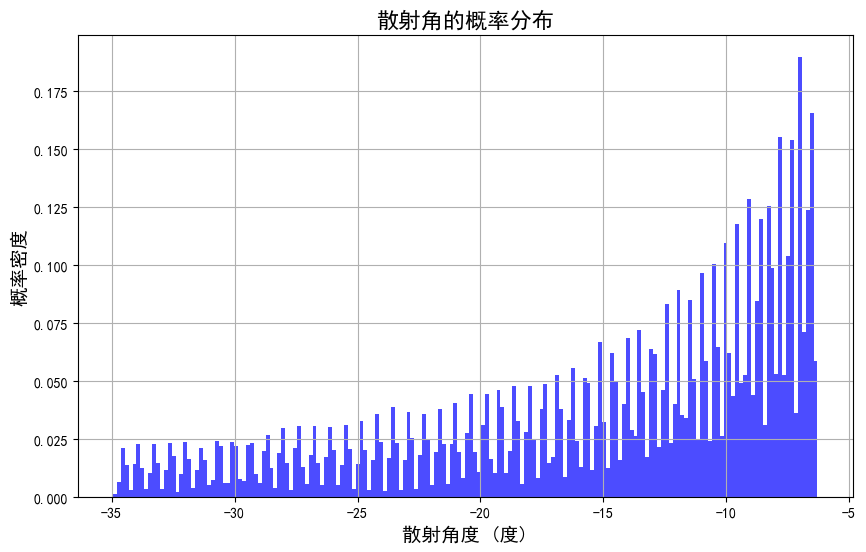

(89820,)


In [22]:
# 单独绘制scattering_angles_deg的直方图
plt.figure(figsize=(10, 6))
plt.hist(scattering_angles, bins=180, density=True, alpha=0.7, color='blue')
plt.xlabel("散射角度 (度)", fontsize=14)
plt.ylabel("概率密度", fontsize=14)
plt.title("散射角的概率分布", fontsize=16)
plt.grid(True)
plt.show()
print(scattering_angles_deg.shape)